# Differencing a time series to get a stationary time series

#### In this example it is necessary to do differencing of order 2, so doing .diff().diff()

Information on .diff() function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html

In [1]:
# getting some warnings from matplotlib, so turning those warnings off
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading csv to dataframe
filename = './data/production.csv'
df = pd.read_csv(filename)

In [3]:
# data before cleaning
df.head(3)

,index,YEAR_,QUARTER_,DATE_
0,89.300,1990.000,1.000,Q1 1990
1,90.600,1990.000,2.000,Q2 1990
2,89.100,1990.000,3.000,Q3 1990


In [4]:
# cleaning data: setting year_quarter as index
# for some reason you have to switch quarter and period around to get to_datetime to work

df = (
    df.assign(year_quarter=pd.PeriodIndex(df['DATE_'].str.replace(r'(Q\d) (\d+)', r'\2-\1'), freq='Q'))
      .set_index('year_quarter')
      .drop(columns=['YEAR_', 'QUARTER_', 'DATE_'])
)

In [5]:
# data after cleaning
df.head(3)

,index
year_quarter,
1990Q1,89.300
1990Q2,90.600
1990Q3,89.100


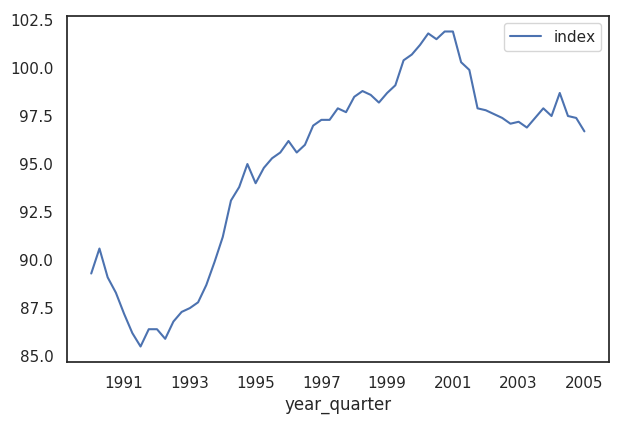

In [6]:
# the original data is not a stationary timeseries
df.plot();

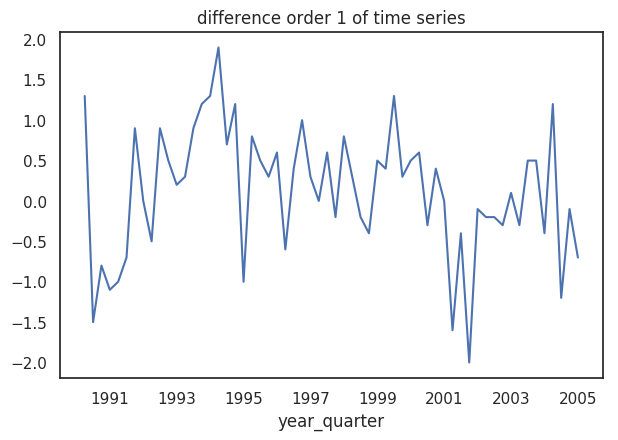

In [7]:
# differencing: calculate difference of order 1
# unfortunately this still does not look like it has stationary mean, it has a downward trend
df['diff1'] = df['index'].diff()
df['diff1'].plot(title='difference order 1 of time series');

## Attention: getting differences of order 2 is basically done by using .diff().diff() (so doing a diff on a diff)

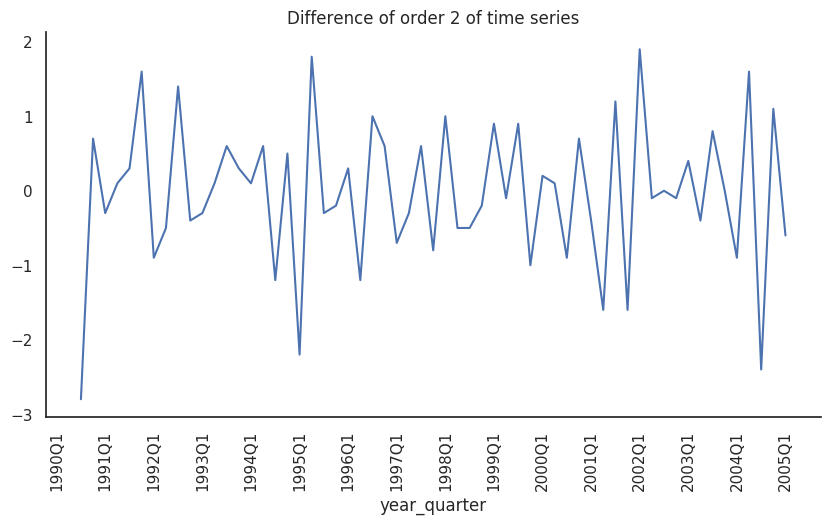

In [8]:
# calculating differences of order 2
# this DOES look stationary: constant in mean and variance, no trend, no seasonality
df['diff2'] = df['diff1'].diff()
df['diff2'].plot(title='Difference of order 2 of time series', figsize=(10,5))
plt.xticks(
    ticks=df['diff2'].index, 
    labels=[label if num%4== 0  else ''  for num, label in enumerate(df['diff2'].index)], rotation=90
)
sns.despine();

## Doing some more checks on the differences of order 2

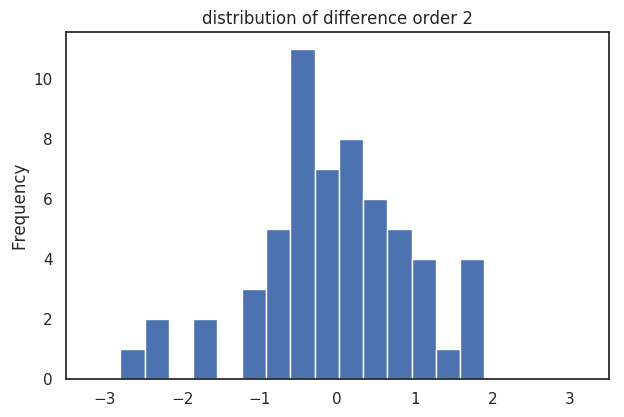

In [9]:
# data of difference of order 2 seems normally distributed
ax = df['diff2'].plot(kind='hist', bins=15)
ax.set(xlim=(-3.5, 3.5), title='distribution of difference order 2');

In [10]:
# mean is around 0
df['diff2'].mean()

-0.03389830508474576

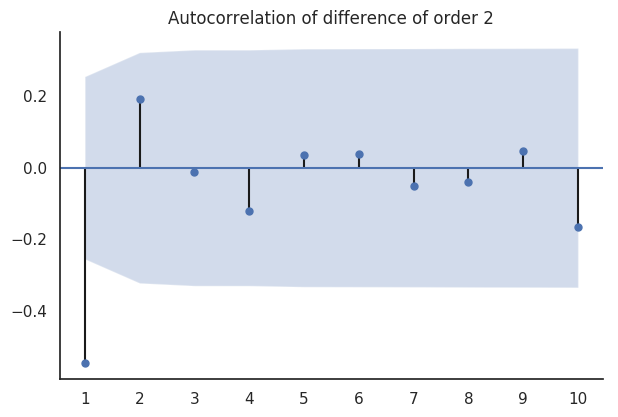

In [11]:
# df['diff2'] is not white noise, since there is autocorrelation at lag 1 (and all autocorrelations should then be zero)
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(1,1)
plot_acf(df['diff2'].loc['1990Q3':], zero=False, lags=10, ax=ax)
ax.set(title='Autocorrelation of difference of order 2')
plt.xticks(ticks=range(1,11), labels=range(1,11))
sns.despine();